# Exploratory Data Analysis
### Build data profiles and tables
Inferential statistics

● Explore data relationships

Data visualization

● Feature Selection and Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve

In [2]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
adopted = pd.read_csv('data/dogs_cleaned.csv')
adopted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7618 entries, 0 to 7617
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   organization_id        7618 non-null   object 
 1   url                    7618 non-null   object 
 2   breeds                 7618 non-null   object 
 3   colors                 7618 non-null   object 
 4   age                    7618 non-null   object 
 5   gender                 7618 non-null   object 
 6   size                   7618 non-null   object 
 7   coat                   6484 non-null   object 
 8   attributes             7618 non-null   object 
 9   environment            7618 non-null   object 
 10  tags                   7618 non-null   object 
 11  name                   7618 non-null   object 
 12  description            7323 non-null   object 
 13  status                 7618 non-null   object 
 14  status_changed_at      7618 non-null   object 
 15  publ

In [4]:
adopted.sample(1)

,organization_id,url,breeds,colors,age,gender,size,coat,attributes,environment,tags,name,description,status,status_changed_at,published_at,distance,contact,duration_as_adoptable,city,hasimage,hasvideo
3746,WA577,https://www.petfinder.com/dog/peach-fredericksburg-litter-45087201/wa/university-place/big-dog-rescue-project-wa577/?referrer_id=2f113f8e-5c9f-4549-8db9-e9e1309fd172,"{'primary': 'Cattle Dog', 'secondary': None, 'mixed': True, 'unknown': False}","{'primary': None, 'secondary': None, 'tertiary': None}",Baby,Female,Medium,Medium,"{'spayed_neutered': False, 'house_trained': False, 'declawed': None, 'special_needs': False, 'shots_current': True}","{'children': True, 'dogs': True, 'cats': True}",[],Peach (Fredericksburg Litter),Please do not inquire or apply through Petfinder. Please apply directly via bigdogrescueproject.org/adopt. Dogs will be transported from Texas upon...,adopted,2019-07-05 17:05:18+00:00,2019-06-26 16:18:20+00:00,2.45110,"{'email': 'bdrpinfo@gmail.com', 'phone': None, 'address': {'address1': '.', 'address2': None, 'city': 'University Place', 'state': 'WA', 'postcode': '98467', 'country': 'US'}}",9.03262,University Place,True,False


# Pulling dictionaries out of columns

In [5]:
attributes = pd.DataFrame(adopted['attributes'].apply(literal_eval).tolist())
attributes.head()

,spayed_neutered,house_trained,declawed,special_needs,shots_current
0,True,True,None,False,True
1,False,True,None,False,False
2,True,True,None,False,True
3,True,True,None,False,True
4,True,True,None,False,True


In [6]:
breeds = pd.DataFrame(adopted['breeds'].apply(literal_eval).tolist())
breeds.columns = ['breed_primary', 'breed_secondary', 'breed_mixed', 'breed_unknown']
breeds.head()

,breed_primary,breed_secondary,breed_mixed,breed_unknown
0,Chihuahua,Miniature Pinscher,True,False
1,Belgian Shepherd / Malinois,None,False,False
2,Rottweiler,None,True,False
3,German Shepherd Dog,None,True,False
4,Shar-Pei,Mixed Breed,True,False


In [7]:
colors = pd.DataFrame(adopted['colors'].apply(literal_eval).tolist())
colors.columns = ['color_primary', 'color_secondary', 'color_tertiary']
colors.head()

,color_primary,color_secondary,color_tertiary
0,Bicolor,None,None
1,None,None,None
2,Red / Chestnut / Orange,None,None
3,White / Cream,None,None
4,Apricot / Beige,White / Cream,None


In [8]:
environment = pd.DataFrame(adopted['environment'].apply(literal_eval).tolist())
environment.columns = ['goodwith_children', 'goodwith_dogs', 'goodwith_cats']
environment.sample(5)

,goodwith_children,goodwith_dogs,goodwith_cats
1237,True,True,True
7293,True,True,True
7295,True,True,True
570,False,False,False
2129,True,True,None


In [9]:
adopted = pd.concat([adopted, attributes, breeds, environment], axis=1, join="inner")
adopted.drop(['attributes', 'breeds', 'environment', 'colors'], axis=1, inplace=True)

In [10]:
# what else can we trim away...
adopted.columns

Index(['organization_id', 'url', 'age', 'gender', 'size', 'coat', 'tags',
       'name', 'description', 'status', 'status_changed_at', 'published_at',
       'distance', 'contact', 'duration_as_adoptable', 'city', 'hasimage',
       'hasvideo', 'spayed_neutered', 'house_trained', 'declawed',
       'special_needs', 'shots_current', 'breed_primary', 'breed_secondary',
       'breed_mixed', 'breed_unknown', 'goodwith_children', 'goodwith_dogs',
       'goodwith_cats'],
      dtype='object')

In [11]:
adopted.drop(['organization_id', 'tags', 'url', 'name', 'published_at', 'description', 'status', 'status_changed_at', 'contact', ], axis=1, inplace=True)
adopted.sample(5)

,age,gender,size,coat,distance,duration_as_adoptable,city,hasimage,hasvideo,spayed_neutered,house_trained,declawed,special_needs,shots_current,breed_primary,breed_secondary,breed_mixed,breed_unknown,goodwith_children,goodwith_dogs,goodwith_cats
2751,Senior,Female,Medium,Short,3.21250,42.92681,Puyallup,True,False,True,True,None,False,True,English Bulldog,American Bulldog,True,False,None,False,False
6193,Young,Female,Large,Short,1.04630,46.13699,Spokane,True,False,False,False,None,False,False,Greyhound,None,True,False,True,True,True
1385,Young,Male,Medium,Short,2.25770,4.15501,Quincy,True,False,True,False,None,False,True,Pit Bull Terrier,None,True,False,True,None,None
5961,Young,Male,Small,Short,9.34270,11.81309,Seattle,True,False,True,False,None,False,True,Chihuahua,None,True,False,None,None,None
3513,Young,Female,Large,Medium,0.69350,24.91418,Burlington,True,False,True,True,None,False,True,Black Labrador Retriever,Pit Bull Terrier,True,False,True,True,None


In [48]:
adopted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7618 entries, 0 to 7617
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    7618 non-null   object 
 1   gender                 7618 non-null   object 
 2   size                   7618 non-null   object 
 3   coat                   6484 non-null   object 
 4   distance               7618 non-null   float64
 5   duration_as_adoptable  7618 non-null   float64
 6   city                   7618 non-null   object 
 7   hasimage               7618 non-null   bool   
 8   hasvideo               7618 non-null   bool   
 9   spayed_neutered        7618 non-null   bool   
 10  house_trained          7618 non-null   bool   
 11  declawed               0 non-null      object 
 12  special_needs          7618 non-null   bool   
 13  shots_current          7618 non-null   bool   
 14  breed_primary          7618 non-null   object 
 15  bree

# EDA Time

**The statistic I care most about is the duration_as_adoptable, since that's what we want to decrease for all animals**

In [12]:
adopted.duration_as_adoptable.describe()

count   7618.00000
mean      41.32680
std       78.37192
min        0.00000
25%        6.15351
50%       15.71205
75%       40.13238
max      833.94365
Name: duration_as_adoptable, dtype: float64

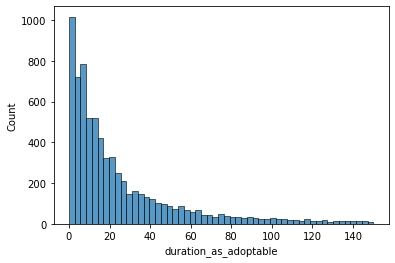

In [13]:
sns.histplot(x='duration_as_adoptable', stat='count', data=adopted, binrange=(0, 150))

**Do larger cities have faster average adoption rates?**

-add populations to adopted

In [29]:
census = pd.read_csv('data/census_wa_cleaned.csv')
census.set_index('index', inplace=True)
census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 613 entries, Aberdeen to Zillah
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Total population                     613 non-null    int64  
 1   Total population Male                613 non-null    int64  
 2   Total population Female              613 non-null    int64  
 3   Total population Median age (years)  613 non-null    float64
 4   Total population 18 and over         613 non-null    int64  
 5   Total population 18 and over Male    613 non-null    int64  
 6   Total population 18 and over Female  613 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 38.3+ KB


In [30]:
census_pop = census[['Total population']]
census_pop.rename(columns={'Total population':'population'}, inplace=True)
census_pop.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,population
index,
Aberdeen,16429
Aberdeen Gardens,261
Addy,139
Ahtanum,3359
Airway Heights,6449


In [31]:
adopted = adopted.join(census_pop, on='city', how='left')
# adopted.rename(columns={'SEX AND AGE Total population':'population'}, inplace=True)
adopted.head()

ValueError: columns overlap but no suffix specified: Index(['population'], dtype='object')

In [32]:
# Do larger cities have faster average adoption rates?
city_count = adopted['city'].value_counts(sort=True)
city_count = pd.DataFrame(data=city_count)
city_count = city_count.join(census_pop, how='left')
city_count.sort_values('city', ascending=False).head(10)

,city,population
Puyallup,740,38720.00000
Woodinville,710,11373.00000
Spokane,606,210695.00000
Seattle,522,653017.00000
Bellingham,394,82944.00000
Longview,346,36619.00000
Othello,288,7624.00000
Yakima,254,93261.00000
Tacoma,254,203481.00000
West Richland,231,13048.00000


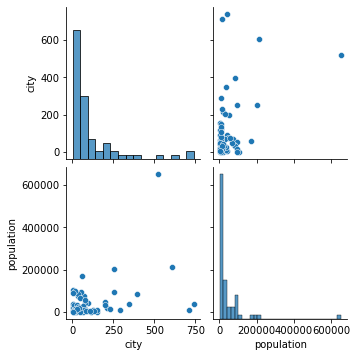

In [33]:
sns.pairplot(city_count)

In [34]:
city_count.corr()

,city,population
city,1.00000,0.40690
population,0.40690,1.00000


**A:** The size of a city doesn't have as strong a correlation to adoption rates as I expected

**Does average age affect adoption rates?**

In [35]:
census_avg_age = census[['Total population Median age (years)']]
census_avg_age.rename(columns={'Total population Median age (years)':'Avg Age'}, inplace=True)
census_avg_age.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Avg Age
index,
Aberdeen,35.40000
Aberdeen Gardens,57.60000
Addy,44.40000
Ahtanum,38.20000
Airway Heights,35.70000


In [36]:
city_count = city_count.join(census_avg_age, how='left')
city_count.sort_values('city', ascending=False).head(10)

,city,population,Avg Age
Puyallup,740,38720.00000,37.70000
Woodinville,710,11373.00000,40.80000
Spokane,606,210695.00000,35.60000
Seattle,522,653017.00000,35.80000
Bellingham,394,82944.00000,31.20000
Longview,346,36619.00000,42.10000
Othello,288,7624.00000,26.90000
Yakima,254,93261.00000,33.10000
Tacoma,254,203481.00000,36.00000
West Richland,231,13048.00000,36.70000


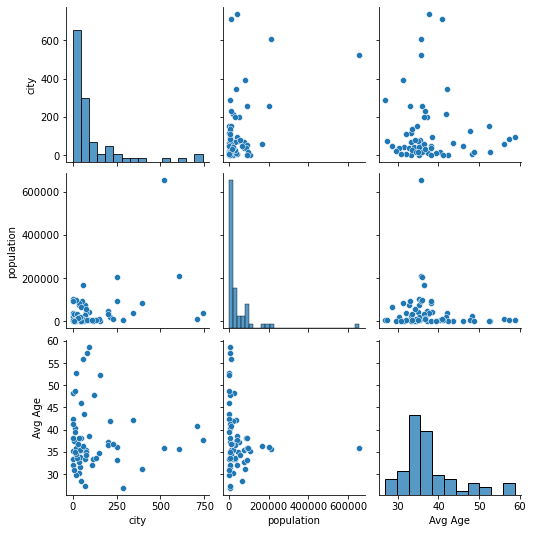

In [37]:
sns.pairplot(city_count)

In [38]:
city_count.corr()

,city,population,Avg Age
city,1.00000,0.40690,-0.03477
population,0.40690,1.00000,-0.13925
Avg Age,-0.03477,-0.13925,1.00000


**A: Average age is not a good indicator of pet adoption rate**

In [46]:
# What are the most adopetd breeds? Alternately, what are the most available breeds?

adopted['breed_primary'].value_counts(sort=True)
# adopted['breed_secondary'].value_counts(sort=True)

Chihuahua                               930
Terrier                                 632
Labrador Retriever                      624
Pit Bull Terrier                        411
German Shepherd Dog                     408
Shepherd                                311
Dachshund                               284
Australian Cattle Dog / Blue Heeler     220
Mixed Breed                             217
Boxer                                   191
Border Collie                           151
American Staffordshire Terrier          150
Australian Shepherd                     149
Husky                                   139
Pomeranian                              110
Poodle                                   99
Shih Tzu                                 97
Siberian Husky                           97
Miniature Pinscher                       87
Retriever                                82
Beagle                                   80
Jack Russell Terrier                     74
Yorkshire Terrier               

**What are the most adopted breeds in each city?**

In [89]:
adopted_by_city = adopted.groupby(['city', 'breed_primary']).size().unstack()
adopted_by_city.sample(10)

breed_primary,Affenpinscher,Airedale Terrier,Akita,Alaskan Malamute,American Bulldog,American Bully,American Eskimo Dog,American Staffordshire Terrier,Anatolian Shepherd,Australian Cattle Dog / Blue Heeler,Australian Kelpie,Australian Shepherd,Basenji,Basset Hound,Beagle,Bearded Collie,Belgian Shepherd / Laekenois,Belgian Shepherd / Malinois,Belgian Shepherd / Sheepdog,Belgian Shepherd / Tervuren,Bernese Mountain Dog,Bichon Frise,Black Labrador Retriever,Black Mouth Cur,Black and Tan Coonhound,Bloodhound,Bluetick Coonhound,Boerboel,Bolognese,Border Collie,Border Terrier,Boston Terrier,Bouvier des Flandres,Boxer,Brittany Spaniel,Brussels Griffon,Bull Terrier,Bullmastiff,Cairn Terrier,Canaan Dog,Cane Corso,Carolina Dog,Catahoula Leopard Dog,Cattle Dog,Cavalier King Charles Spaniel,Chesapeake Bay Retriever,Chihuahua,Chinese Crested Dog,Chiweenie,Chocolate Labrador Retriever,Chow Chow,Cockapoo,Cocker Spaniel,Collie,Coonhound,Corgi,Coton de Tulear,Dachshund,Dalmatian,Dandie Dinmont Terrier,Doberman Pinscher,Dogo Argentino,Dogue de Bordeaux,Dutch Shepherd,English Bulldog,English Pointer,English Shepherd,English Springer Spaniel,Flat-Coated Retriever,Fox Terrier,French Bulldog,German Pinscher,German Shepherd Dog,German Shorthaired Pointer,German Wirehaired Pointer,Golden Retriever,Great Dane,Great Pyrenees,Greyhound,Havanese,Hound,Husky,Ibizan Hound,Irish Terrier,Irish Wolfhound,Italian Greyhound,Jack Russell Terrier,Japanese Chin,Jindo,Karelian Bear Dog,Labrador Retriever,Leonberger,Lhasa Apso,Maltese,Maltipoo,Manchester Terrier,Mastiff,Miniature Dachshund,Miniature Pinscher,Miniature Poodle,Miniature Schnauzer,Mixed Breed,Mountain Cur,Neapolitan Mastiff,Newfoundland Dog,Norfolk Terrier,Norwich Terrier,Nova Scotia Duck Tolling Retriever,Papillon,Parson Russell Terrier,Patterdale Terrier / Fell Terrier,Pekingese,Pembroke Welsh Corgi,Pharaoh Hound,Pit Bull Terrier,Plott Hound,Pointer,Pomeranian,Poodle,Pug,Pumi,Rat Terrier,Redbone Coonhound,Retriever,Rhodesian Ridgeback,Rottweiler,Rough Collie,Saint Bernard,Saluki,Samoyed,Schipperke,Schnauzer,Scottish Terrier,Setter,Shar-Pei,Sheep Dog,Shepherd,Shetland Sheepdog / Sheltie,Shiba Inu,Shih Tzu,Shih poo,Siberian Husky,Silky Terrier,Smooth Collie,Spaniel,Spitz,Staffordshire Bull Terrier,Standard Poodle,Standard Schnauzer,Terrier,Thai Ridgeback,Tibetan Spaniel,Tibetan Terrier,Tosa Inu,Toy Fox Terrier,Treeing Walker Coonhound,Vizsla,Weimaraner,Welsh Springer Spaniel,Welsh Terrier,West Highland White Terrier / Westie,Wheaten Terrier,Whippet,White German Shepherd,Wire Fox Terrier,Wirehaired Dachshund,Wirehaired Pointing Griffon,Wirehaired Terrier,Xoloitzcuintli / Mexican Hairless,Yellow Labrador Retriever,Yorkshire Terrier
city,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Port Townsend,nan,nan,nan,1.00000,2.00000,nan,nan,nan,1.00000,2.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.00000,nan,nan,nan,nan,1.00000,nan,nan,nan,nan,nan,nan,nan,8.00000,1.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,7.00000,nan,nan,nan,nan,nan,nan,nan,2.00000,nan,nan,nan,nan,nan,1.00000,nan,nan,nan,8.00000,nan,nan,1.00000,nan,nan,nan,nan,nan,nan,1.00000,nan,nan,nan,1.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,5.00000,nan,1.00000,nan,nan,2.00000,nan,1.00000,2.00000,nan,1.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00000,1.00000,nan,1.00000,nan,nan,nan,nan,nan,2.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Oak Harbor,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.00000,nan,nan,nan,nan,1.00000,nan,nan,nan,nan,nan,nan,nan,2.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00000,nan,nan,nan,nan,nan,nan,nan,3.00000,nan,nan,1.00000,nan,nan,nan,nan,nan,1.00000,nan,2.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,

In [93]:
most_adopted_by_city = adopted_by_city.idxmax(axis=1)
print("Most adopted dog per city:")
most_adopted_by_city

Most adopted dog per city:


city
Auburn                               German Shepherd Dog
Bainbridge Island         American Staffordshire Terrier
Bellingham                            Labrador Retriever
Benton City                                        Boxer
Blaine                                          Shih Tzu
Bonney Lake               American Staffordshire Terrier
Bothell                              German Shepherd Dog
Bow                                          Mixed Breed
Bremerton                                          Boxer
Burlington                           Australian Shepherd
Camano Island                                  Chihuahua
Cashmere                              Labrador Retriever
Coupeville                                     Chihuahua
Covington                                      Chihuahua
Deer Park                                 Siberian Husky
Elma                                               Jindo
Everett                                        Chihuahua
Federal Way               

# Machine Learning

In [135]:
df = adopted[['gender', 'size', 'coat', 'duration_as_adoptable', 'hasimage', 'hasvideo', 'spayed_neutered', 'house_trained', 'declawed', 'special_needs', 'shots_current', 'goodwith_children', 'goodwith_dogs', 'goodwith_cats']]
df[['hasimage', 'hasvideo', 'spayed_neutered', 'house_trained', 'special_needs', 'shots_current']] = adopted[['hasimage', 'hasvideo', 'spayed_neutered', 'house_trained', 'special_needs', 'shots_current']].astype(int)
df = pd.get_dummies(df)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [136]:
df.head()

,duration_as_adoptable,hasimage,hasvideo,spayed_neutered,house_trained,special_needs,shots_current,gender_Female,gender_Male,size_Extra Large,size_Large,size_Medium,size_Small,coat_Curly,coat_Hairless,coat_Long,coat_Medium,coat_Short,coat_Wire,goodwith_children_False,goodwith_children_True,goodwith_dogs_False,goodwith_dogs_True,goodwith_cats_False,goodwith_cats_True
0,48.39076,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1
1,5.15957,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0
2,59.33155,1,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1
3,6.01187,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,60.87508,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7618 entries, 0 to 7617
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_as_adoptable    7618 non-null   float64
 1   hasimage                 7618 non-null   int64  
 2   hasvideo                 7618 non-null   int64  
 3   spayed_neutered          7618 non-null   int64  
 4   house_trained            7618 non-null   int64  
 5   special_needs            7618 non-null   int64  
 6   shots_current            7618 non-null   int64  
 7   gender_Female            7618 non-null   uint8  
 8   gender_Male              7618 non-null   uint8  
 9   size_Extra Large         7618 non-null   uint8  
 10  size_Large               7618 non-null   uint8  
 11  size_Medium              7618 non-null   uint8  
 12  size_Small               7618 non-null   uint8  
 13  coat_Curly               7618 non-null   uint8  
 14  coat_Hairless           

In [138]:
df_corr = df.corr()
df_corr

,duration_as_adoptable,hasimage,hasvideo,spayed_neutered,house_trained,special_needs,shots_current,gender_Female,gender_Male,size_Extra Large,size_Large,size_Medium,size_Small,coat_Curly,coat_Hairless,coat_Long,coat_Medium,coat_Short,coat_Wire,goodwith_children_False,goodwith_children_True,goodwith_dogs_False,goodwith_dogs_True,goodwith_cats_False,goodwith_cats_True
duration_as_adoptable,1.00000,0.04414,0.05734,0.06857,0.14960,0.10626,-0.01108,-0.01933,0.01933,0.02069,0.07825,0.00500,-0.08210,-0.03124,-0.00840,-0.01744,-0.03695,0.00911,-0.01226,0.11862,0.00906,0.15011,0.02073,0.15434,-0.02368
hasimage,0.04414,1.00000,0.02117,-0.00542,0.04715,0.00354,0.01874,0.01187,-0.01187,0.01538,-0.01001,0.00930,-0.00390,0.00596,0.00312,-0.02292,-0.00900,0.00917,0.00067,-0.02054,0.03466,0.01192,0.03728,0.02750,0.02009
hasvideo,0.05734,0.02117,1.00000,0.03559,0.07023,0.01052,-0.03245,0.00073,-0.00073,0.00295,0.02450,0.06013,-0.08231,-0.02680,-0.00557,-0.02219,0.01027,0.03125,-0.02076,0.00655,0.06934,0.02868,0.05669,0.06937,0.06372
spayed_neutered,0.06857,-0.00542,0.03559,1.00000,0.34583,0.04316,0.32779,-0.02377,0.02377,-0.01439,0.07542,0.00497,-0.07043,-0.02855,0.00212,0.00884,0.03172,0.00543,-0.01911,0.12995,0.04379,0.07297,0.06237,0.14235,0.02363
house_trained,0.14960,0.04715,0.07023,0.34583,1.00000,0.05281,0.16414,0.01401,-0.01401,0.04071,0.08720,0.04951,-0.13918,-0.03831,-0.01125,-0.00462,0.03485,0.02153,-0.02657,0.10058,0.19852,0.12328,0.20017,0.20443,0.06215
special_needs,0.10626,0.00354,0.01052,0.04316,0.05281,1.00000,0.00584,-0.00698,0.00698,0.00682,0.01326,-0.03126,0.01676,0.03269,-0.00467,0.06053,-0.00597,-0.02446,0.02961,0.08319,0.00271,0.04409,0.03018,0.01404,0.05344
shots_current,-0.01108,0.01874,-0.03245,0.32779,0.16414,0.00584,1.00000,-0.01854,0.01854,-0.02604,-0.01578,-0.04419,0.06459,0.02015,-0.00973,0.00422,0.01220,-0.00301,0.01006,0.03638,-0.02756,0.01748,0.00216,0.03917,-0.02255
gender_Female,-0.01933,0.01187,0.00073,-0.02377,0.01401,-0.00698,-0.01854,1.00000,-1.00000,-0.05419,-0.06832,0.09343,-0.01505,-0.00829,0.01683,-0.01060,0.00830,0.01823,-0.01070,-0.04326,0.02737,0.02839,0.00590,-0.00039,0.01461
gender_Male,0.01933,-0.01187,-0.00073,0.02377,-0.01401,0.00698,0.01854,-1.00000,1.00000,0.05419,0.06832,-0.09343,0.01505,0.00829,-0.01683,0.01060,-0.00830,-0.01823,0.01070,0.04326,-0.02737,-0.02839,-0.00590,0.00039,-0.01461
size_Extra Large,0.02069,0.01538,0.00295,-0.01439,0.04071,0.00682,-0.02604,-0.05419,0.05419,1.00000,-0.07689,-0.09133,-0.09734,-0.01559,-0.00324,0.06317,-0.01907,0.00444,-0.01750,0.02803,0.02231,-0.00205,0.00846,0.03215,0.01171


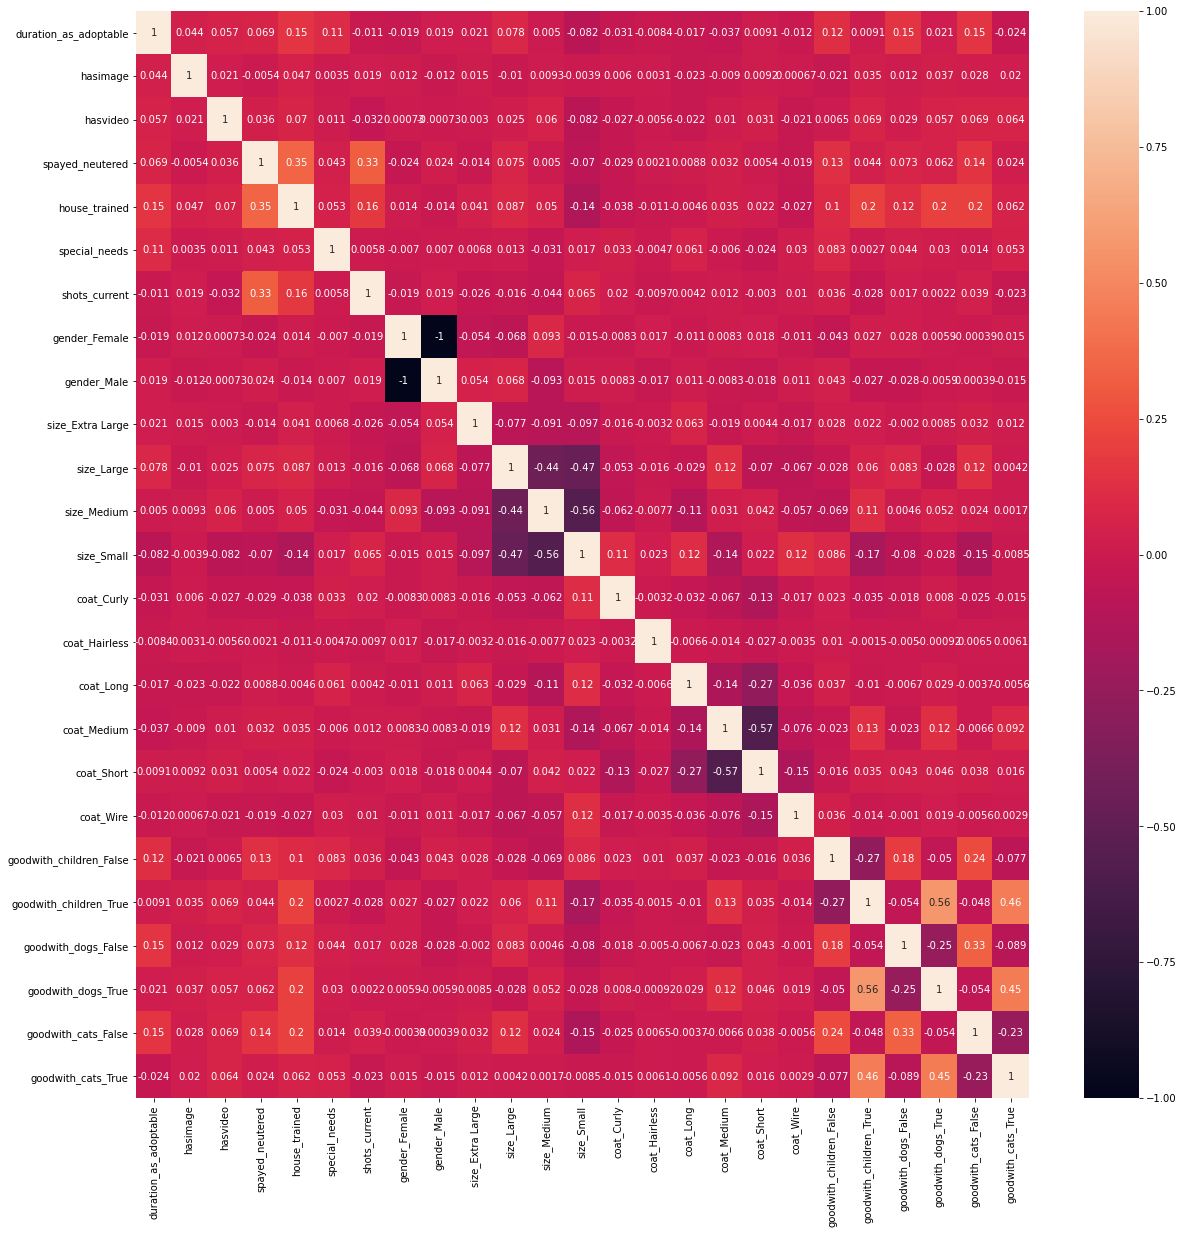

In [139]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_corr, annot = True)

In [140]:
df.dtypes

duration_as_adoptable      float64
hasimage                     int64
hasvideo                     int64
spayed_neutered              int64
house_trained                int64
special_needs                int64
shots_current                int64
gender_Female                uint8
gender_Male                  uint8
size_Extra Large             uint8
size_Large                   uint8
size_Medium                  uint8
size_Small                   uint8
coat_Curly                   uint8
coat_Hairless                uint8
coat_Long                    uint8
coat_Medium                  uint8
coat_Short                   uint8
coat_Wire                    uint8
goodwith_children_False      uint8
goodwith_children_True       uint8
goodwith_dogs_False          uint8
goodwith_dogs_True           uint8
goodwith_cats_False          uint8
goodwith_cats_True           uint8
dtype: object

In [141]:
len(df) * .7, len(df) * .3

(5332.599999999999, 2285.4)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='duration_as_adoptable'), 
                                                    df.duration_as_adoptable, test_size=0.3, 
                                                    random_state=47)

In [143]:
X_train.shape, X_test.shape

((5332, 24), (2286, 24))

In [144]:
y_train.shape, y_test.shape

((5332,), (2286,))

In [145]:
X_train.dtypes

hasimage                   int64
hasvideo                   int64
spayed_neutered            int64
house_trained              int64
special_needs              int64
shots_current              int64
gender_Female              uint8
gender_Male                uint8
size_Extra Large           uint8
size_Large                 uint8
size_Medium                uint8
size_Small                 uint8
coat_Curly                 uint8
coat_Hairless              uint8
coat_Long                  uint8
coat_Medium                uint8
coat_Short                 uint8
coat_Wire                  uint8
goodwith_children_False    uint8
goodwith_children_True     uint8
goodwith_dogs_False        uint8
goodwith_dogs_True         uint8
goodwith_cats_False        uint8
goodwith_cats_True         uint8
dtype: object

In [146]:
X_test.dtypes

hasimage                   int64
hasvideo                   int64
spayed_neutered            int64
house_trained              int64
special_needs              int64
shots_current              int64
gender_Female              uint8
gender_Male                uint8
size_Extra Large           uint8
size_Large                 uint8
size_Medium                uint8
size_Small                 uint8
coat_Curly                 uint8
coat_Hairless              uint8
coat_Long                  uint8
coat_Medium                uint8
coat_Short                 uint8
coat_Wire                  uint8
goodwith_children_False    uint8
goodwith_children_True     uint8
goodwith_dogs_False        uint8
goodwith_dogs_True         uint8
goodwith_cats_False        uint8
goodwith_cats_True         uint8
dtype: object

## Random Forest Model

In [147]:
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

In [148]:
rf_default_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [149]:
rf_cv_scores = rf_default_results['test_score']
rf_cv_scores

array([ 0.02638645, -0.12904097,  0.11342317, -0.16798117, -0.08530893])

In [150]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(-0.04850429131901217, 0.10386971578178517)

In [151]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [152]:
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [153]:
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [154]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 88,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

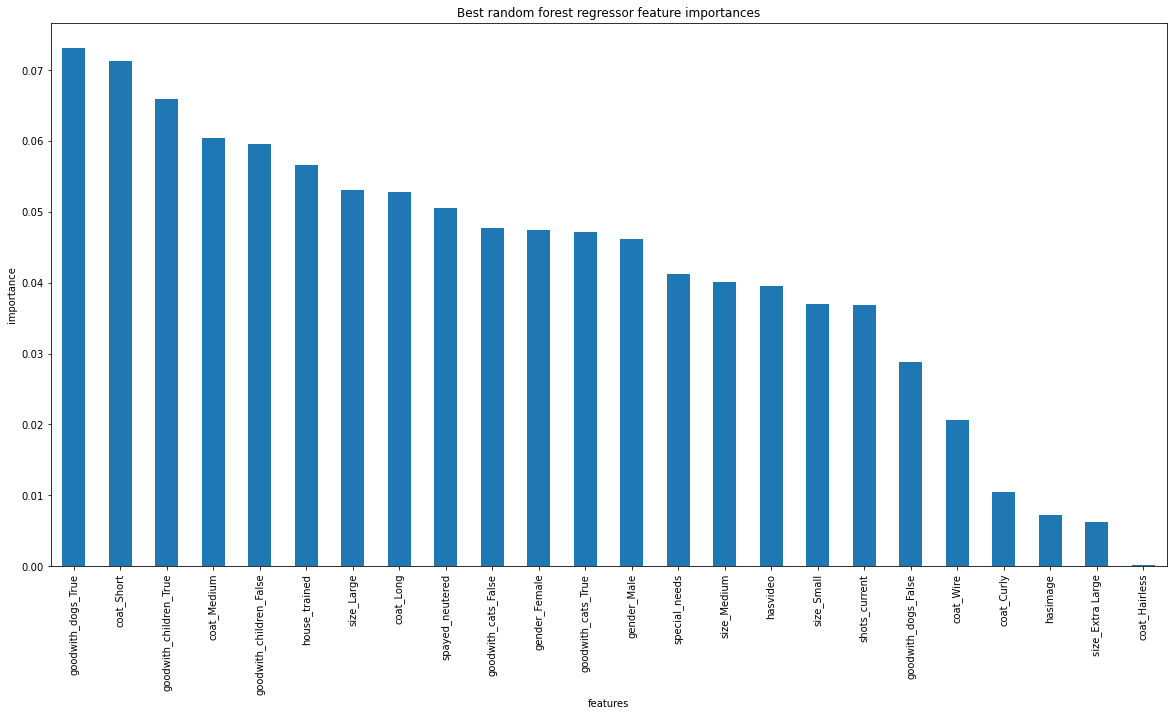

In [155]:
plt.subplots(figsize=(20, 10))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)[:50]
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

## XG Boost Model

In [156]:
import xgboost as xgb

In [157]:
xg_reg = xgb.XGBRegressor(objective ='multi:softprob', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10, num_class = 8561)

In [158]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[21:49:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [159]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

ValueError: y_true and y_pred have different number of output (1!=8561)

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [ ]:
y_train.shape

In [ ]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [ ]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 8561} 

steps = 20

In [ ]:
xgmodel = xgb.train(param, D_train, steps)

In [ ]:
xgmodel.dump_model('dump.raw.txt')